# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [2]:
(_,_), (X, y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Пример вывода нескольких объектов и соответствующих меток классов:

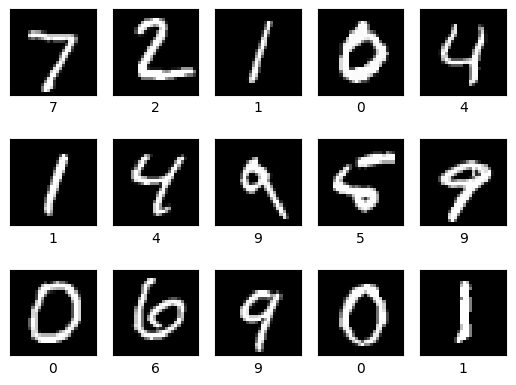

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [4]:
X.shape

(10000, 28, 28)

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [5]:
# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [7]:
# Преобразование изображений в одномерные массивы
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Обучение модели KMeans
model = KMeans(n_clusters=10, random_state=33)
model.fit(X_train_flat)

KMeans(n_clusters=10, random_state=33)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [8]:
# Получение меток кластеров для обучающей выборки
cluster_labels = model.labels_

# Определение числа элементов, отнесенных к кластеру с меткой 5
count_cluster_5 = np.sum(cluster_labels == 5)
print("Число элементов в кластере 5:", count_cluster_5)

Число элементов в кластере 5: 660


Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



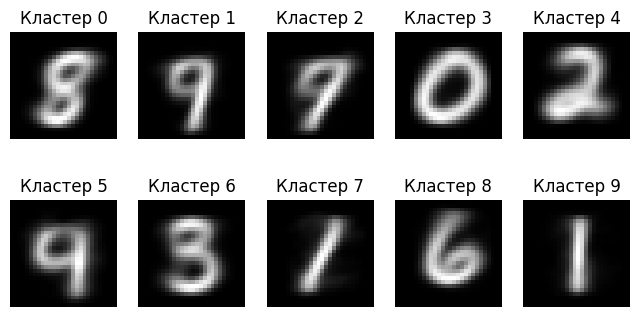

In [9]:
# Получение координат центроидов
centroids = model.cluster_centers_

# Преобразование координат центроидов обратно в размер 28x28
centroids_images = centroids.reshape(10, 28, 28)

# Построение изображений центроидов
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids_images[i], cmap='gray')
    plt.title(f'Кластер {i}')
    plt.axis('off')

plt.show()

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [10]:
# Создадим словарь для отображения меток кластеров на предполагаемые метки цифр
cluster_to_digit = {}

# Определим предполагаемые метки для каждого кластера
for cluster in range(10):
    cluster_indices = np.where(cluster_labels == cluster)[0]  # Индексы объектов в кластере
    cluster_digit_counts = np.bincount(y_train[cluster_indices])  # Подсчет количества каждой цифры в кластере
    most_common_digit = np.argmax(cluster_digit_counts)  # Наиболее часто встречающаяся цифра в кластере
    cluster_to_digit[cluster] = most_common_digit

# Присвоим правильные метки кластерам
corrected_cluster_labels = np.array([cluster_to_digit[cluster] for cluster in cluster_labels])

# Выведем метки кластеров после преобразования
print("Метки кластеров после коррекции:", corrected_cluster_labels)

Метки кластеров после коррекции: [7 0 9 ... 1 3 6]


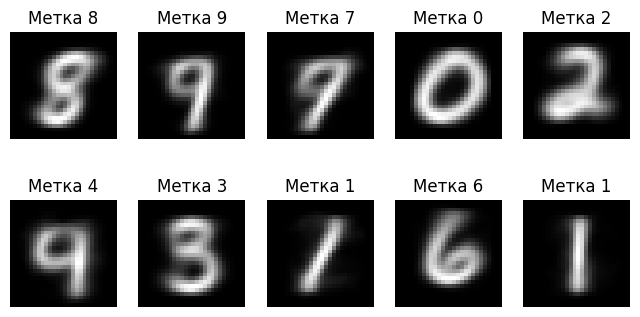

In [11]:
# Построим изображения на основе центроидов с правильными метками
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids_images[i], cmap='gray')
    plt.title(f'Метка {cluster_to_digit[i]}')
    plt.axis('off')

plt.show()

Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [12]:
# Вычисление accuracy
accuracy = accuracy_score(y_train, corrected_cluster_labels)

print("Accuracy после коррекции меток кластеров:", accuracy)

Accuracy после коррекции меток кластеров: 0.591375


При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [13]:
# Преобразование изображений тестового набора в одномерные массивы (распрямление)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Кластеризация тестовых данных
predicted_cluster_labels = model.predict(X_test_flat)

# Преобразование меток кластеров тестовых данных с использованием преобразования для тренировочного набора
corrected_predicted_cluster_labels = np.array([cluster_to_digit[cluster] for cluster in predicted_cluster_labels])

# Вывод преобразованных меток кластеров для тестовых данных
print("Преобразованные метки кластеров для тестовых данных:", corrected_predicted_cluster_labels)

Преобразованные метки кластеров для тестовых данных: [9 0 3 ... 9 1 2]


Постройте матрицу ошибок.

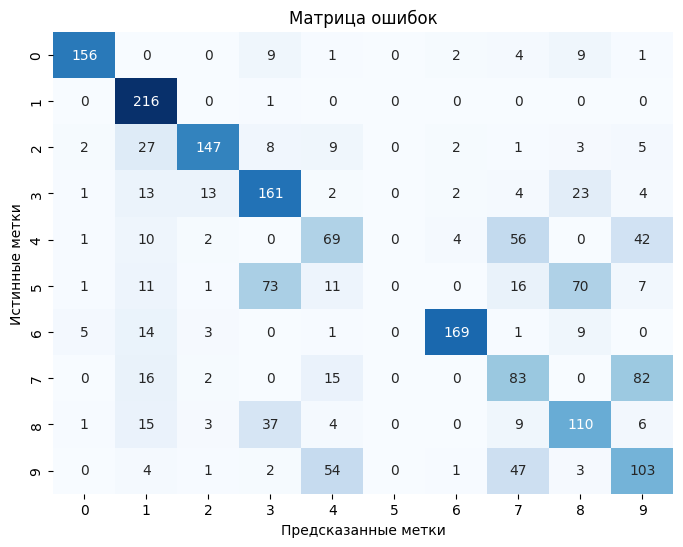

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Построение матрицы ошибок
confusion = confusion_matrix(y_test, corrected_predicted_cluster_labels)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [ ]:
# С тройкой

Вычислите точность модели на тестовых данных.

In [19]:
# Вычисление точности
accuracy_test = accuracy_score(y_test, corrected_predicted_cluster_labels)

print("Точность модели на тестовых данных:", accuracy_test)

Точность модели на тестовых данных: 0.607


Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

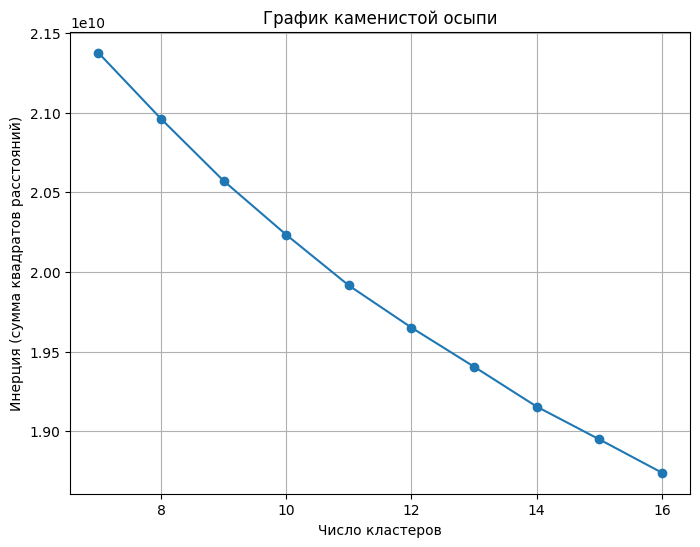

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Список для сохранения значений инерции (суммы квадратов расстояний до ближайшего центроида)
inertia = []

# Попробуем разное число кластеров от 7 до 16
for n_clusters in range(7, 17):
    kmeans = KMeans(n_clusters=n_clusters, random_state=33)
    kmeans.fit(X_train_flat)
    inertia.append(kmeans.inertia_)

# Построение графика каменистой осыпи
plt.figure(figsize=(8, 6))
plt.plot(range(7, 17), inertia, marker='o', linestyle='-')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция (сумма квадратов расстояний)')
plt.title('График каменистой осыпи')
plt.grid(True)
plt.show()

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [22]:
# Создание экземпляра t-SNE с указанными параметрами
tsne = TSNE(n_components=2, init='random', random_state=33)

# Преобразование тренировочных данных
X_train_tsne = tsne.fit_transform(X_train_flat)

Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [23]:
# Кластеризация данных t-SNE
kmeans_tsne = KMeans(n_clusters=10, random_state=33)
kmeans_tsne.fit(X_train_tsne)

# Получение меток кластеров для данных t-SNE
cluster_labels_tsne = kmeans_tsne.labels_

# Создадим словарь для отображения меток кластеров на предполагаемые метки цифр
cluster_to_digit_tsne = {}

# Определим предполагаемые метки для каждого кластера
for cluster in range(10):
    cluster_indices = np.where(cluster_labels_tsne == cluster)[0]  # Индексы объектов в кластере
    cluster_digit_counts = np.bincount(y_train[cluster_indices])  # Подсчет количества каждой цифры в кластере
    most_common_digit = np.argmax(cluster_digit_counts)  # Наиболее часто встречающаяся цифра в кластере
    cluster_to_digit_tsne[cluster] = most_common_digit

# Присвоим правильные метки кластерам
corrected_cluster_labels_tsne = np.array([cluster_to_digit_tsne[cluster] for cluster in cluster_labels_tsne])

In [24]:
# Вычисление точности
accuracy_train_tsne = accuracy_score(y_train, corrected_cluster_labels_tsne)

print("Точность модели на тренировочных данных (после t-SNE):", accuracy_train_tsne)

Точность модели на тренировочных данных (после t-SNE): 0.827125


Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.